# Import liberaries 

In [1]:
#code here 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
#import liberaries


# Read the data 

In [85]:
#code here
df=pd.read_csv("/content/diabetic_kidney_disease.csv")
df.head()

,FBG (mg/dL),HbA1C (%),Total cholesterol (mg/dL),UACR (mg/g creatinine)
0,140,8.7,144,16.0
1,135,7.5,170,8.0
2,140,8.0,180,23.0
3,190,14.0,122,38.0
4,250,13.5,167,21.0


# Data preprocessing

### Check for Nulls

In [151]:
df.isna().sum()

FBG (mg/dL)                  0
HbA1C (%)                    0
Total cholesterol (mg/dL)    0
UACR (mg/g creatinine)       0
dtype: int64

### Check For Outliers

<Axes: >

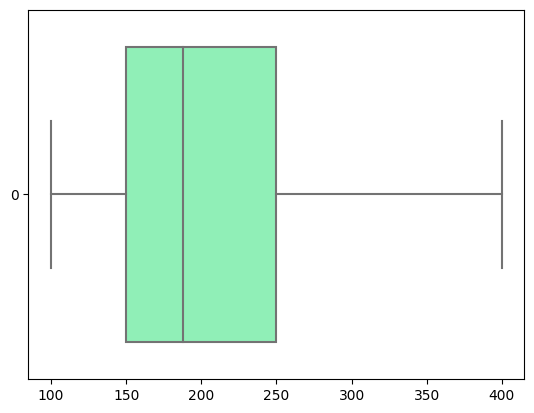

In [6]:
#code 
sns.boxplot(data=df['FBG (mg/dL)'],palette='rainbow',orient='h')


<Axes: >

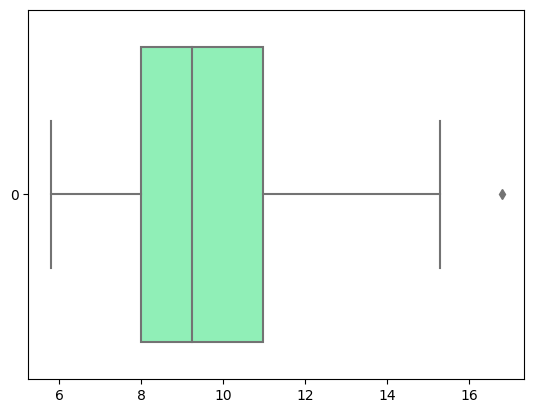

In [7]:
sns.boxplot(data=df['HbA1C (%)'],palette='rainbow',orient='h')


<Axes: >

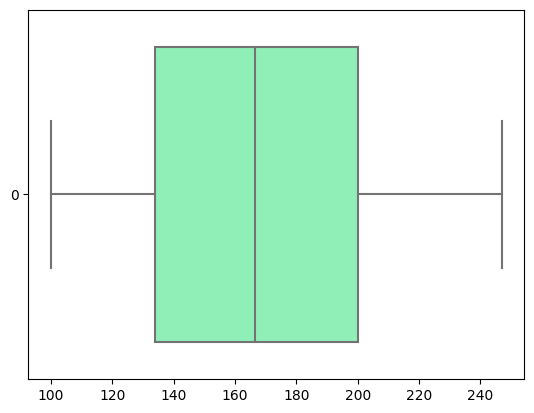

In [8]:

sns.boxplot(data=df['Total cholesterol (mg/dL)'],palette='rainbow',orient='h')


<Axes: >

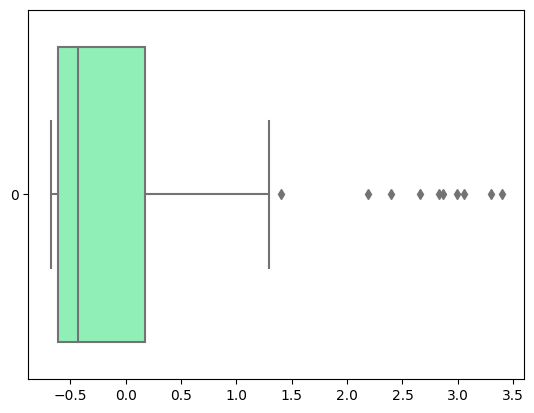

In [79]:
sns.boxplot(data=df['UACR (mg/g creatinine)'],palette='rainbow',orient='h')

### Overview on the data

In [10]:
df.shape

(110, 4)

In [33]:
corr=df['UACR (mg/g creatinine)'].corr(df['Total cholesterol (mg/dL)'])
print(corr)

0.11706511166160646


In [35]:
corr=df['UACR (mg/g creatinine)'].corr(df['HbA1C (%)'])
print(corr)

0.5195237512730286


In [36]:
corr=df['UACR (mg/g creatinine)'].corr(df['FBG (mg/dL)'])
print(corr)

0.7506696604473574


### Standralization

In [152]:
df = (df-df.mean())/df.std()

### Making the linear regression model using sk learn library

In [132]:
#code here 
x =df['FBG (mg/dL)'].values.reshape(-1, 1)
#x = df.drop(columns=['UACR (mg/g creatinine)', 'Total cholesterol (mg/dL)'])
y=df['UACR (mg/g creatinine)']

In [148]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x,y ,test_size= 0.18,random_state=44)

In [149]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)

### Calaculating the accuracy 

In [150]:
#code here 
model.score(x_test,y_test)*100

79.08876985277874